In [2]:
import pandas as pd

dataset = pd.read_csv('dataset.csv')


In [3]:
dataset.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [4]:
dataset.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [5]:
dataset.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [6]:
dataset.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [7]:
import numpy as np
x = np.array(dataset['horas_estudo_mes'], dtype = float)
x = x.reshape(-1, 1)
print(x)

[[ 57.]
 [ 48.]
 [ 60.]
 [ 73.]
 [ 46.]
 [ 46.]
 [ 74.]
 [ 62.]
 [ 43.]
 [ 58.]
 [ 43.]
 [ 43.]
 [ 54.]
 [ 21.]
 [ 24.]
 [ 42.]
 [ 35.]
 [ 55.]
 [ 36.]
 [ 29.]
 [ 72.]
 [ 47.]
 [ 51.]
 [ 29.]
 [ 42.]
 [ 52.]
 [ 33.]
 [ 56.]
 [ 41.]
 [ 46.]
 [ 41.]
 [ 78.]
 [ 50.]
 [ 34.]
 [ 62.]
 [ 32.]
 [ 53.]
 [ 21.]
 [ 30.]
 [ 53.]
 [ 61.]
 [ 53.]
 [ 48.]
 [ 45.]
 [ 28.]
 [ 39.]
 [ 43.]
 [ 66.]
 [ 55.]
 [ 24.]
 [ 55.]
 [ 44.]
 [ 40.]
 [ 59.]
 [ 65.]
 [ 64.]
 [ 37.]
 [ 45.]
 [ 55.]
 [ 65.]
 [ 43.]
 [ 47.]
 [ 33.]
 [ 32.]
 [ 62.]
 [ 70.]
 [ 49.]
 [ 65.]
 [ 55.]
 [ 40.]
 [ 55.]
 [ 73.]
 [ 49.]
 [ 73.]
 [ 11.]
 [ 62.]
 [ 51.]
 [ 46.]
 [ 51.]
 [ 20.]
 [ 47.]
 [ 55.]
 [ 72.]
 [ 42.]
 [ 38.]
 [ 42.]
 [ 64.]
 [ 55.]
 [ 42.]
 [ 58.]
 [ 51.]
 [ 65.]
 [ 39.]
 [ 45.]
 [ 44.]
 [ 28.]
 [ 54.]
 [ 54.]
 [ 50.]
 [ 46.]
 [ 29.]
 [ 44.]
 [ 45.]
 [ 38.]
 [ 48.]
 [ 56.]
 [ 78.]
 [ 53.]
 [ 54.]
 [ 49.]
 [ 21.]
 [ 50.]
 [ 51.]
 [ 87.]
 [ 47.]
 [ 55.]
 [ 49.]
 [ 32.]
 [ 67.]
 [ 61.]
 [ 62.]
 [ 36.]
 [ 71.]
 [ 29.]
 [ 59.]


<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

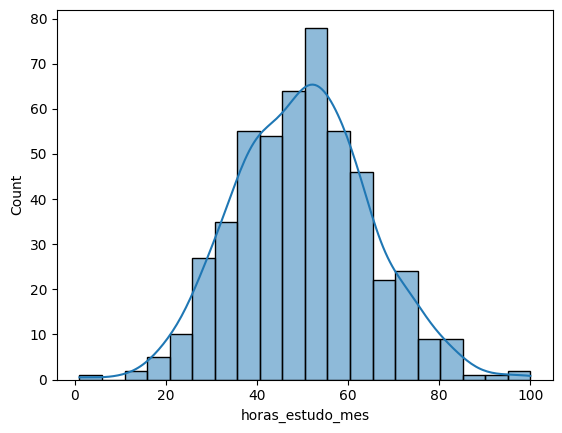

In [8]:
"""
> histrogram shows the distribution of the data following a Gaussian distribution (normal distribution).
"""
import seaborn as sns
sns.histplot(dataset['horas_estudo_mes'], kde = True)

In [9]:
"""
> Setting the variables for the linear regression
> X = input variable, Y = output variable
"""
x = np.array(dataset['horas_estudo_mes'], dtype = float)
x = x.reshape(-1, 1)
y = dataset['salario']

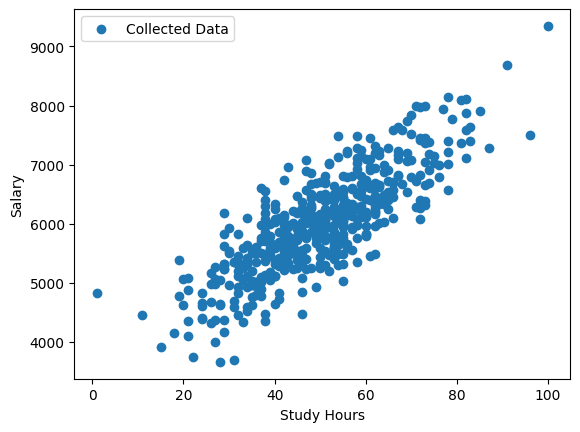

In [10]:
"""
> Scatterplot to verify the correlation between the variables
"""
from matplotlib import pyplot as plt
plt.scatter(x, y, label = 'Collected Data')
plt.xlabel('Study Hours')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [11]:
import sklearn as sk
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# 20% of the data is used for testing and 80% for training.
# random state = 42 is the seed for the random number generator (but it's not necessary, it's just to make the results reproducible).

In [12]:
x_train.shape # x is a one dimension matrix

(400, 1)

In [13]:
x_test.shape

(100, 1)

In [14]:
y_train.shape # y is a vector

(400,)

In [15]:
y_test.shape

(100,)

In [16]:
from sklearn.linear_model import LinearRegression

# Creating the model
model = LinearRegression()

# Training the model
model.fit(x_train, y_train)

LinearRegression()

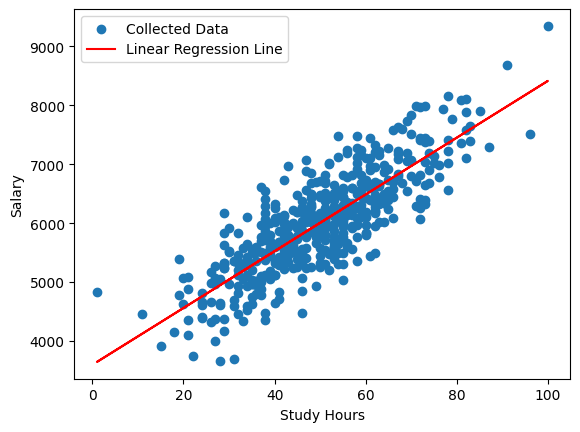

In [17]:
# Visualizing the linear regression line
plt.scatter(x, y, label = 'Collected Data')
plt.plot(x, model.predict(x), color = 'red', label = 'Linear Regression Line')
plt.xlabel('Study Hours')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [18]:
# Accuracy of the model
score = model.score(x_test, y_test)
print('Accuracy (R^2): {:.2f}'.format(score))

Accuracy (R^2): 0.59


In [19]:
# Intercept - w0
model.intercept_

3596.783724372753

In [20]:
# Slope - w1
model.coef_

array([48.18185277])

In [22]:
# DEPLOY MODEL

In [21]:
# Define a new value for study hours
new_study_hours = np.array([[48]])

# Predicting the salary for the new study hours
predict_salary = model.predict(new_study_hours)

print(f'If you study for {new_study_hours} hours, your salary will be ${predict_salary}')

If you study for [[48]] hours, your salary will be $[5909.5126574]


In [24]:
# Proving the result
y_new = model.intercept_ + model.coef_ * new_study_hours # y = w0 + w1 * x

# the model training is for obtain the w0 and w1 values, 
# so we can use the formula y = w0 + w1 * x to predict the salary for a new study hours value.
print(f'If you study for {new_study_hours} hours, your salary will be ${y_new}')

If you study for [[48]] hours, your salary will be $[[5909.5126574]]
